In [1]:
'''
This file plots CMIP5 RCP - HIST over South Australia
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/CMIP5/figures

Earl Duran 
created: 19-Mar-18
e.duran@unsw.edu.au
'''

import cosima_cookbook as cc
import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
import pickle
import itertools
def find_nearest_index(array, value):
    return int((np.abs(array - value)).argmin())
from scipy import interpolate
from scipy import stats
from dask.distributed import Client

import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])

session = cc.database.create_session()

Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:34003 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [4]:
# input_path = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

output_path = '/g/data/e14/erd561/Australia_3/'

In [7]:
%%time
# blonw=122
# blone=138
# blats=-50
# blatn=-43
lonW = 122-360
lonE = 138-360
latN = -30
latS = -70
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
print(expt)

temp_xm128_1_mod_month = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean.nc',
                                     variable='temp').\
sel(xt_ocean=slice(lonW,lonE)).\
sel(yt_ocean=slice(latS,latN)).\
sel(st_ocean=slice(0,2100))-273.15
print(temp_xm128_1_mod_month)

temp_xm128_1_mod_month.load()
print(temp_xm128_1_mod_month)

xt_ocean = temp_xm128_1_mod_month.xt_ocean
xt_ocean_corrected = xt_ocean + 360
temp_xm128_1_mod_month = temp_xm128_1_mod_month.assign_coords(xt_ocean=xt_ocean_corrected)
st_ocean = temp_xm128_1_mod_month.st_ocean
st_ocean_corrected = -st_ocean
temp_xm128_1_mod_month = temp_xm128_1_mod_month.assign_coords(st_ocean=st_ocean_corrected)
print(temp_xm128_1_mod_month)

temp_xm128_1_mod = temp_xm128_1_mod_month.groupby('time.year').mean('time')
print(temp_xm128_1_mod)

temp_xm128_1_mod = temp_xm128_1_mod.sel(year=slice(2004+60*4,2017+60*4)).mean('xt_ocean')
print(temp_xm128_1_mod)

1deg_jra55v13_iaf_spinup1_B1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'temp' (time: 300, st_ocean: 35, yt_ocean: 51, xt_ocean: 16)>
dask.array<sub, shape=(300, 35, 51, 16), dtype=float32, chunksize=(1, 25, 51, 16), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 1.854e+03 2.046e+03
  * xt_ocean  (xt_ocean) float64 -237.5 -236.5 -235.5 ... -224.5 -223.5 -222.5
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... -32.5 -31.5 -30.5
  * time      (time) object 1958-07-02 12:00:00 ... 2257-07-02 12:00:00
<xarray.DataArray 'temp' (time: 300, st_ocean: 35, yt_ocean: 51, xt_ocean: 16)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'temp' (year: 300, st_ocean: 35, yt_ocean: 51, xt_ocean: 16)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., 

In [8]:
year = temp_xm128_1_mod.year
depth_1_mod = temp_xm128_1_mod.st_ocean
lat_1_mod = temp_xm128_1_mod.yt_ocean

temp_xm128_1_trans_mod = temp_xm128_1_mod
print(np.shape(temp_xm128_1_trans_mod))
temp_xm128_1_slope_mod = xr.DataArray(
    np.zeros([np.shape(depth_1_mod)[0], np.shape(lat_1_mod)[0]]), dims=(
    'depth_1', 'lat_1'), coords=[depth_1_mod, lat_1_mod], name='temp_xm128_1')
temp_xm128_1_p_value_mod = xr.DataArray(
    np.zeros([np.shape(depth_1_mod)[0], np.shape(lat_1_mod)[0]]), dims=(
    'depth_1', 'lat_1'), coords=[depth_1_mod, lat_1_mod], name='temp_xm128_1')
temp_xm128_1_std_err_mod = xr.DataArray(
    np.zeros([np.shape(depth_1_mod)[0], np.shape(lat_1_mod)[0]]), dims=(
    'depth_1', 'lat_1'), coords=[depth_1_mod, lat_1_mod], name='temp_xm128_1')
for iid, i in enumerate(depth_1_mod):
    for jid, j in enumerate(lat_1_mod):
        temp_xm128_1_slope_mod[iid, jid], _, _, temp_xm128_1_p_value_mod[iid, jid], temp_xm128_1_std_err_mod[iid, jid] = \
        stats.linregress(year, temp_xm128_1_trans_mod[:, iid, jid])
    print('depth_1_mod ' + str(np.array(i)))
print(temp_xm128_1_slope_mod)

(14, 35, 51)
depth_1_mod -1.15174989182586
depth_1_mod -3.6486741197120196
depth_1_mod -6.564918471676153
depth_1_mod -9.970869194872916
depth_1_mod -13.948708373749158
depth_1_mod -18.594379460593196
depth_1_mod -24.019873617545198
depth_1_mod -30.355885242559452
depth_1_mod -37.754889932903495
depth_1_mod -46.39470194845016
depth_1_mod -56.48256969937929
depth_1_mod -68.25986482598941
depth_1_mod -82.00740970018322
depth_1_mod -98.05146439730592
depth_1_mod -116.77034928747688
depth_1_mod -138.60160118643546
depth_1_mod -164.04943216631892
depth_1_mod -193.69205664349184
depth_1_mod -228.1881444592732
depth_1_mod -268.2812141854562
depth_1_mod -314.800181990729
depth_1_mod -368.65354740782504
depth_1_mod -430.8139438640983
depth_1_mod -502.28929308570173
depth_1_mod -584.0771003035616
depth_1_mod -677.1002526914099
depth_1_mod -782.1267221440287
depth_1_mod -899.6817765561261
depth_1_mod -1029.9681126743835
depth_1_mod -1172.813371535859
depth_1_mod -1327.6620295174746
depth_1_mod -1

In [9]:
%%time
# blonw=122
# blone=138
# blats=-50
# blatn=-43
lonW = 122-360
lonE = 138-360
latN = -30
latS = -70
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
print(expt)

temp_xm128_025_mod_month = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean.nc',
                                     variable='temp').\
sel(xt_ocean=slice(lonW,lonE)).\
sel(yt_ocean=slice(latS,latN)).\
sel(st_ocean=slice(0,2100))-273.15
print(temp_xm128_025_mod_month)

temp_xm128_025_mod_month.load()
print(temp_xm128_025_mod_month)

xt_ocean = temp_xm128_025_mod_month.xt_ocean
xt_ocean_corrected = xt_ocean + 360
temp_xm128_025_mod_month = temp_xm128_025_mod_month.assign_coords(xt_ocean=xt_ocean_corrected)
st_ocean = temp_xm128_025_mod_month.st_ocean
st_ocean_corrected = -st_ocean
temp_xm128_025_mod_month = temp_xm128_025_mod_month.assign_coords(st_ocean=st_ocean_corrected)
print(temp_xm128_025_mod_month)

temp_xm128_025_mod = temp_xm128_025_mod_month.groupby('time.year').mean('time')
print(temp_xm128_025_mod)

temp_xm128_025_mod = temp_xm128_025_mod.sel(year=slice(2004+60*4,2017+60*4)).mean('xt_ocean')
print(temp_xm128_025_mod)

025deg_jra55v13_iaf_gmredi6


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'temp' (time: 300, st_ocean: 35, yt_ocean: 267, xt_ocean: 64)>
dask.array<sub, shape=(300, 35, 267, 64), dtype=float32, chunksize=(1, 10, 156, 64), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 1.854e+03 2.046e+03
  * xt_ocean  (xt_ocean) float64 -237.9 -237.6 -237.4 ... -222.6 -222.4 -222.1
  * yt_ocean  (yt_ocean) float64 -69.99 -69.88 -69.78 ... -30.56 -30.35 -30.13
  * time      (time) object 1958-06-30 12:00:00 ... 2257-06-30 12:00:00
<xarray.DataArray 'temp' (time: 300, st_ocean: 35, yt_ocean: 267, xt_ocean: 64)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, .

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'temp' (year: 300, st_ocean: 35, yt_ocean: 267, xt_ocean: 64)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ...,

In [10]:
year = temp_xm128_025_mod.year
depth_025_mod = temp_xm128_025_mod.st_ocean
lat_025_mod = temp_xm128_025_mod.yt_ocean

temp_xm128_025_trans_mod = temp_xm128_025_mod
print(np.shape(temp_xm128_025_trans_mod))
temp_xm128_025_slope_mod = xr.DataArray(
    np.zeros([np.shape(depth_025_mod)[0], np.shape(lat_025_mod)[0]]), dims=(
    'depth_025', 'lat_025'), coords=[depth_025_mod, lat_025_mod], name='temp_xm128_025')
temp_xm128_025_p_value_mod = xr.DataArray(
    np.zeros([np.shape(depth_025_mod)[0], np.shape(lat_025_mod)[0]]), dims=(
    'depth_025', 'lat_025'), coords=[depth_025_mod, lat_025_mod], name='temp_xm128_025')
temp_xm128_025_std_err_mod = xr.DataArray(
    np.zeros([np.shape(depth_025_mod)[0], np.shape(lat_025_mod)[0]]), dims=(
    'depth_025', 'lat_025'), coords=[depth_025_mod, lat_025_mod], name='temp_xm128_025')
for iid, i in enumerate(depth_025_mod):
    for jid, j in enumerate(lat_025_mod):
        temp_xm128_025_slope_mod[iid, jid], _, _, temp_xm128_025_p_value_mod[iid, jid], temp_xm128_025_std_err_mod[iid, jid] = \
        stats.linregress(year, temp_xm128_025_trans_mod[:, iid, jid])
    print('depth_025_mod ' + str(np.array(i)))
print(temp_xm128_025_slope_mod)

(14, 35, 267)
depth_025_mod -1.15174989182586
depth_025_mod -3.6486741197120196
depth_025_mod -6.564918471676153
depth_025_mod -9.970869194872916
depth_025_mod -13.948708373749158
depth_025_mod -18.594379460593196
depth_025_mod -24.019873617545198
depth_025_mod -30.355885242559452
depth_025_mod -37.754889932903495
depth_025_mod -46.39470194845016
depth_025_mod -56.48256969937929
depth_025_mod -68.25986482598941
depth_025_mod -82.00740970018322
depth_025_mod -98.05146439730592
depth_025_mod -116.77034928747688
depth_025_mod -138.60160118643546
depth_025_mod -164.04943216631892
depth_025_mod -193.69205664349184
depth_025_mod -228.1881444592732
depth_025_mod -268.2812141854562
depth_025_mod -314.800181990729
depth_025_mod -368.65354740782504
depth_025_mod -430.8139438640983
depth_025_mod -502.28929308570173
depth_025_mod -584.0771003035616
depth_025_mod -677.1002526914099
depth_025_mod -782.1267221440287
depth_025_mod -899.6817765561261
depth_025_mod -1029.9681126743835
depth_025_mod -117

In [5]:
%%time
# blonw=122
# blone=138
# blats=-50
# blatn=-43
lonW = 122-360
lonE = 138-360
latN = -30
latS = -70
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
print(expt)

temp_xm128_01_mod_month = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean.nc',
                                     variable='temp').\
sel(xt_ocean=np.arange(lonW,lonE+0.01,0.5), method='nearest').\
sel(yt_ocean=slice(latS,latN)).\
sel(st_ocean=slice(0,2100))-273.15
print(temp_xm128_01_mod_month)

temp_xm128_01_mod_month.load()
print(temp_xm128_01_mod_month)

xt_ocean = temp_xm128_01_mod_month.xt_ocean
xt_ocean_corrected = xt_ocean + 360
temp_xm128_01_mod_month = temp_xm128_01_mod_month.assign_coords(xt_ocean=xt_ocean_corrected)
st_ocean = temp_xm128_01_mod_month.st_ocean
st_ocean_corrected = -st_ocean
temp_xm128_01_mod_month = temp_xm128_01_mod_month.assign_coords(st_ocean=st_ocean_corrected)
print(temp_xm128_01_mod_month)

temp_xm128_01_mod = temp_xm128_01_mod_month.groupby('time.year').mean('time')
print(temp_xm128_01_mod)

temp_xm128_01_mod = temp_xm128_01_mod.sel(year=slice(2004,2017)).mean('xt_ocean')
print(temp_xm128_01_mod)

01deg_jra55v13_iaf


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'temp' (time: 396, st_ocean: 55, yt_ocean: 667, xt_ocean: 33)>
dask.array<sub, shape=(396, 55, 667, 33), dtype=float32, chunksize=(1, 7, 300, 33), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 1.858e+03 2.007e+03
  * xt_ocean  (xt_ocean) float64 -238.0 -237.5 -237.0 ... -223.0 -222.5 -222.0
  * yt_ocean  (yt_ocean) float64 -70.0 -69.96 -69.92 ... -30.24 -30.15 -30.07
  * time      (time) object 1985-01-14 12:00:00 ... 2017-12-14 12:00:00
<xarray.DataArray 'temp' (time: 396, st_ocean: 55, yt_ocean: 667, xt_ocean: 33)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ...

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'temp' (year: 33, st_ocean: 55, yt_ocean: 667, xt_ocean: 33)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., 

In [6]:
year = temp_xm128_01_mod.year
depth_01_mod = temp_xm128_01_mod.st_ocean
lat_01_mod = temp_xm128_01_mod.yt_ocean

temp_xm128_01_trans_mod = temp_xm128_01_mod
print(np.shape(temp_xm128_01_trans_mod))
temp_xm128_01_slope_mod = xr.DataArray(
    np.zeros([np.shape(depth_01_mod)[0], np.shape(lat_01_mod)[0]]), dims=(
    'depth_01', 'lat_01'), coords=[depth_01_mod, lat_01_mod], name='temp_xm128_01')
temp_xm128_01_p_value_mod = xr.DataArray(
    np.zeros([np.shape(depth_01_mod)[0], np.shape(lat_01_mod)[0]]), dims=(
    'depth_01', 'lat_01'), coords=[depth_01_mod, lat_01_mod], name='temp_xm128_01')
temp_xm128_01_std_err_mod = xr.DataArray(
    np.zeros([np.shape(depth_01_mod)[0], np.shape(lat_01_mod)[0]]), dims=(
    'depth_01', 'lat_01'), coords=[depth_01_mod, lat_01_mod], name='temp_xm128_01')
for iid, i in enumerate(depth_01_mod):
    for jid, j in enumerate(lat_01_mod):
        temp_xm128_01_slope_mod[iid, jid], _, _, temp_xm128_01_p_value_mod[iid, jid], temp_xm128_01_std_err_mod[iid, jid] = \
        stats.linregress(year, temp_xm128_01_trans_mod[:, iid, jid])
    print('depth_01_mod ' + str(np.array(i)))
print(temp_xm128_01_slope_mod)

(14, 55, 667)
depth_01_mod -0.5412807653916101
depth_01_mod -1.680734679831433
depth_01_mod -2.939952648914465
depth_01_mod -4.331521485149508
depth_01_mod -5.8693504240540255
depth_01_mod -7.5688099200502155
depth_01_mod -9.446884959648713
depth_01_mod -11.522344392803275
depth_01_mod -13.815927932333222
depth_01_mod -16.350552632935347
depth_01_mod -19.151540835805992
depth_01_mod -22.24687175218868
depth_01_mod -25.667459058670023
depth_01_mod -29.447457087455206
depth_01_mod -33.62459841385048
depth_01_mod -38.24056586677453
depth_01_mod -43.341402211041604
depth_01_mod -48.97796096317406
depth_01_mod -55.20640199365842
depth_01_mod -62.088735720175855
depth_01_mod -69.69341978534455
depth_01_mod -78.09601210263148
depth_01_mod -87.37988400213499
depth_01_mod -97.63699685168024
depth_01_mod -108.96874488209758
depth_01_mod -121.48686590184016
depth_01_mod -135.31441999260392
depth_01_mod -150.5868339523135
depth_01_mod -167.45300594349283
depth_01_mod -186.07646019149857
depth_01_m

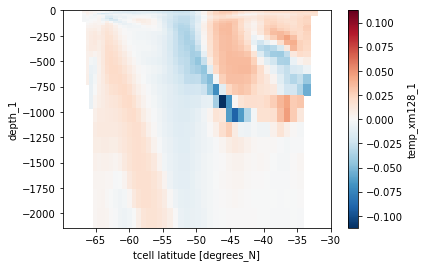

In [11]:
temp_xm128_1_slope_mod.plot()

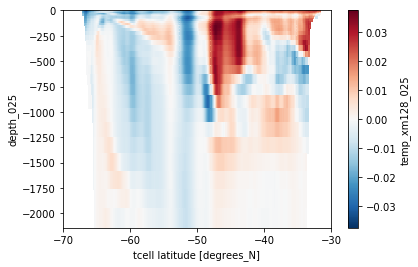

In [12]:
temp_xm128_025_slope_mod.plot()

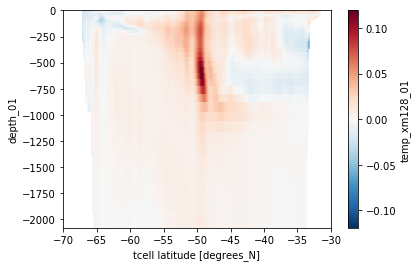

In [13]:
temp_xm128_01_slope_mod.plot()

In [22]:
temp_xm128_1_mod_xr = xr.DataArray(temp_xm128_1_mod.transpose('st_ocean', 'yt_ocean', 'year'), name='temp_xm128_1_mod',
                        coords=[depth_1_mod, lat_1_mod, year], 
                        dims=['st_ocean', 'yt_ocean', 'year'])
print(temp_xm128_1_mod_xr)
temp_xm128_1_mod_xr.to_netcdf(output_path + 'temp_xm128_1_mod.nc')

temp_xm128_1_slope_mod_xr = xr.DataArray(temp_xm128_1_slope_mod, name='temp_xm128_1_slope_mod',
                        coords=[depth_1_mod, lat_1_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(temp_xm128_1_slope_mod_xr)
temp_xm128_1_slope_mod_xr.to_netcdf(output_path + 'temp_xm128_1_slope_mod.nc')

temp_xm128_1_p_value_mod_xr = xr.DataArray(temp_xm128_1_p_value_mod, name='temp_xm128_1_p_value_mod',
                        coords=[depth_1_mod, lat_1_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(temp_xm128_1_p_value_mod_xr)
temp_xm128_1_p_value_mod_xr.to_netcdf(output_path + 'temp_xm128_1_p_value_mod.nc')

temp_xm128_1_std_err_mod_xr = xr.DataArray(temp_xm128_1_std_err_mod, name='temp_xm128_1_std_err_mod',
                        coords=[depth_1_mod, lat_1_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(temp_xm128_1_std_err_mod_xr)
temp_xm128_1_std_err_mod_xr.to_netcdf(output_path + 'temp_xm128_1_std_err_mod.nc')



temp_xm128_025_mod_xr = xr.DataArray(temp_xm128_025_mod.transpose('st_ocean', 'yt_ocean', 'year'), name='temp_xm128_025_mod',
                        coords=[depth_025_mod, lat_025_mod, year], 
                        dims=['st_ocean', 'yt_ocean', 'year'])
print(temp_xm128_025_mod_xr)
temp_xm128_025_mod_xr.to_netcdf(output_path + 'temp_xm128_025_mod.nc')

temp_xm128_025_slope_mod_xr = xr.DataArray(temp_xm128_025_slope_mod, name='temp_xm128_025_slope_mod',
                        coords=[depth_025_mod, lat_025_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(temp_xm128_025_slope_mod_xr)
temp_xm128_025_slope_mod_xr.to_netcdf(output_path + 'temp_xm128_025_slope_mod.nc')

temp_xm128_025_p_value_mod_xr = xr.DataArray(temp_xm128_025_p_value_mod, name='temp_xm128_025_p_value_mod',
                        coords=[depth_025_mod, lat_025_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(temp_xm128_025_p_value_mod_xr)
temp_xm128_025_p_value_mod_xr.to_netcdf(output_path + 'temp_xm128_025_p_value_mod.nc')

temp_xm128_025_std_err_mod_xr = xr.DataArray(temp_xm128_025_std_err_mod, name='temp_xm128_025_std_err_mod',
                        coords=[depth_025_mod, lat_025_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(temp_xm128_025_std_err_mod_xr)
temp_xm128_025_std_err_mod_xr.to_netcdf(output_path + 'temp_xm128_025_std_err_mod.nc')



temp_xm128_01_mod_xr = xr.DataArray(temp_xm128_01_mod.transpose('st_ocean', 'yt_ocean', 'year'), name='temp_xm128_01_mod',
                        coords=[depth_01_mod, lat_01_mod, year], 
                        dims=['st_ocean', 'yt_ocean', 'year'])
print(temp_xm128_01_mod_xr)
temp_xm128_01_mod_xr.to_netcdf(output_path + 'temp_xm128_01_mod.nc')

temp_xm128_01_slope_mod_xr = xr.DataArray(temp_xm128_01_slope_mod, name='temp_xm128_01_slope_mod',
                        coords=[depth_01_mod, lat_01_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(temp_xm128_01_slope_mod_xr)
temp_xm128_01_slope_mod_xr.to_netcdf(output_path + 'temp_xm128_01_slope_mod.nc')

temp_xm128_01_p_value_mod_xr = xr.DataArray(temp_xm128_01_p_value_mod, name='temp_xm128_01_p_value_mod',
                        coords=[depth_01_mod, lat_01_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(temp_xm128_01_p_value_mod_xr)
temp_xm128_01_p_value_mod_xr.to_netcdf(output_path + 'temp_xm128_01_p_value_mod.nc')

temp_xm128_01_std_err_mod_xr = xr.DataArray(temp_xm128_01_std_err_mod, name='temp_xm128_01_std_err_mod',
                        coords=[depth_01_mod, lat_01_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(temp_xm128_01_std_err_mod_xr)
temp_xm128_01_std_err_mod_xr.to_netcdf(output_path + 'temp_xm128_01_std_err_mod.nc')

<xarray.DataArray 'temp_xm128_1_mod' (st_ocean: 35, yt_ocean: 51, year: 14)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [17.285942, 17.240822, 17.2799  , ..., 17.561443, 17.372612,
         17.444439],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [17.277508, 17.232452, 17.270874, ..., 17.55009 , 17.361328,
         17.4329

  * year      (year) int64 2004 2005 2006 2007 2008 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'temp_xm128_025_slope_mod' (st_ocean: 35, yt_ocean: 267)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * st_ocean  (st_ocean) float64 -1.152 -3.649 -6.565 ... -1.854e+03 -2.046e+03
  * yt_ocean  (yt_ocean) float64 -69.99 -69.88 -69.78 ... -30.56 -30.35 -30.13
<xarray.DataArray 'temp_xm128_025_p_value_mod' (st_ocean: 35, yt_ocean: 267)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * st_ocean  (st_ocean) f

In [17]:
%%time
# blonw=122
# blone=138
# blats=-50
# blatn=-43
lonW = 122-360
lonE = 138-360
latN = -30
latS = -70
ekey='1deg'
expt = exptdata.exptdict[ekey]['expt']
print(expt)

salt_xm128_1_mod_month = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean.nc',
                                     variable='salt').\
sel(xt_ocean=slice(lonW,lonE)).\
sel(yt_ocean=slice(latS,latN)).\
sel(st_ocean=slice(0,2100))-273.15
print(salt_xm128_1_mod_month)

salt_xm128_1_mod_month.load()
print(salt_xm128_1_mod_month)

xt_ocean = salt_xm128_1_mod_month.xt_ocean
xt_ocean_corrected = xt_ocean + 360
salt_xm128_1_mod_month = salt_xm128_1_mod_month.assign_coords(xt_ocean=xt_ocean_corrected)
st_ocean = salt_xm128_1_mod_month.st_ocean
st_ocean_corrected = -st_ocean
salt_xm128_1_mod_month = salt_xm128_1_mod_month.assign_coords(st_ocean=st_ocean_corrected)
print(salt_xm128_1_mod_month)

salt_xm128_1_mod = salt_xm128_1_mod_month.groupby('time.year').mean('time').mean('xt_ocean')
print(salt_xm128_1_mod)

salt_xm128_1_mod = salt_xm128_1_mod.sel(year=slice(2004+60*4,2017+60*4))
print(salt_xm128_1_mod)

year = salt_xm128_1_mod.year
depth_1_mod = salt_xm128_1_mod.st_ocean
lat_1_mod = salt_xm128_1_mod.yt_ocean

salt_xm128_1_trans_mod = salt_xm128_1_mod
print(np.shape(salt_xm128_1_trans_mod))
salt_xm128_1_slope_mod = xr.DataArray(
    np.zeros([np.shape(depth_1_mod)[0], np.shape(lat_1_mod)[0]]), dims=(
    'depth_1', 'lat_1'), coords=[depth_1_mod, lat_1_mod], name='salt_xm128_1')
salt_xm128_1_p_value_mod = xr.DataArray(
    np.zeros([np.shape(depth_1_mod)[0], np.shape(lat_1_mod)[0]]), dims=(
    'depth_1', 'lat_1'), coords=[depth_1_mod, lat_1_mod], name='salt_xm128_1')
salt_xm128_1_std_err_mod = xr.DataArray(
    np.zeros([np.shape(depth_1_mod)[0], np.shape(lat_1_mod)[0]]), dims=(
    'depth_1', 'lat_1'), coords=[depth_1_mod, lat_1_mod], name='salt_xm128_1')
for iid, i in enumerate(depth_1_mod):
    for jid, j in enumerate(lat_1_mod):
        salt_xm128_1_slope_mod[iid, jid], _, _, salt_xm128_1_p_value_mod[iid, jid], salt_xm128_1_std_err_mod[iid, jid] = \
        stats.linregress(year, salt_xm128_1_trans_mod[:, iid, jid])
    print('depth_1_mod ' + str(np.array(i)))
print(salt_xm128_1_slope_mod)

1deg_jra55v13_iaf_spinup1_B1


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'salt' (time: 300, st_ocean: 35, yt_ocean: 51, xt_ocean: 16)>
dask.array<sub, shape=(300, 35, 51, 16), dtype=float32, chunksize=(1, 25, 51, 16), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 1.854e+03 2.046e+03
  * xt_ocean  (xt_ocean) float64 -237.5 -236.5 -235.5 ... -224.5 -223.5 -222.5
  * yt_ocean  (yt_ocean) float64 -69.63 -69.18 -68.71 ... -32.5 -31.5 -30.5
  * time      (time) object 1958-07-02 12:00:00 ... 2257-07-02 12:00:00
<xarray.DataArray 'salt' (time: 300, st_ocean: 35, yt_ocean: 51, xt_ocean: 16)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'salt' (year: 300, st_ocean: 35, yt_ocean: 51)>
array([[[       nan,        nan,        nan, ..., -237.19133,
                nan,        nan],
        [       nan,        nan,        nan, ..., -237.19153,
                nan,        nan],
        [       nan,        nan,        nan, ..., -237.19174,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ..., -237.28236,
                nan,        nan],
        [       nan,        nan,        nan, ..., -237.28258,
                nan,        nan],
        [       nan,        nan,        nan, ..., -237.28271,
                nan,        nan],
        ...,
        [       nan,        nan,        na

depth_1_mod -98.05146439730592
depth_1_mod -116.77034928747688
depth_1_mod -138.60160118643546
depth_1_mod -164.04943216631892
depth_1_mod -193.69205664349184
depth_1_mod -228.1881444592732
depth_1_mod -268.2812141854562
depth_1_mod -314.800181990729
depth_1_mod -368.65354740782504
depth_1_mod -430.8139438640983
depth_1_mod -502.28929308570173
depth_1_mod -584.0771003035616
depth_1_mod -677.1002526914099
depth_1_mod -782.1267221440287
depth_1_mod -899.6817765561261
depth_1_mod -1029.9681126743835
depth_1_mod -1172.813371535859
depth_1_mod -1327.6620295174746
depth_1_mod -1493.618454761941
depth_1_mod -1669.533396965427
depth_1_mod -1854.1141182462907
depth_1_mod -2046.0343763841533
<xarray.DataArray 'salt_xm128_1' (depth_1: 35, lat_1: 51)>
array([[       nan,        nan,        nan, ..., 0.00373361,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.00374531,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.00376537,  

In [19]:
%%time
# blonw=122
# blone=138
# blats=-50
# blatn=-43
lonW = 122-360
lonE = 138-360
latN = -30
latS = -70
ekey='025deg'
expt = exptdata.exptdict[ekey]['expt']
print(expt)

salt_xm128_025_mod_month = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean.nc',
                                     variable='salt').\
sel(xt_ocean=slice(lonW,lonE)).\
sel(yt_ocean=slice(latS,latN)).\
sel(st_ocean=slice(0,2100))-273.15
print(salt_xm128_025_mod_month)

salt_xm128_025_mod_month.load()
print(salt_xm128_025_mod_month)

xt_ocean = salt_xm128_025_mod_month.xt_ocean
xt_ocean_corrected = xt_ocean + 360
salt_xm128_025_mod_month = salt_xm128_025_mod_month.assign_coords(xt_ocean=xt_ocean_corrected)
st_ocean = salt_xm128_025_mod_month.st_ocean
st_ocean_corrected = -st_ocean
salt_xm128_025_mod_month = salt_xm128_025_mod_month.assign_coords(st_ocean=st_ocean_corrected)
print(salt_xm128_025_mod_month)

salt_xm128_025_mod = salt_xm128_025_mod_month.groupby('time.year').mean('time')
print(salt_xm128_025_mod)

salt_xm128_025_mod = salt_xm128_025_mod.sel(year=slice(2004+60*4,2017+60*4)).mean('xt_ocean')
print(salt_xm128_025_mod)

year = salt_xm128_025_mod.year
depth_025_mod = salt_xm128_025_mod.st_ocean
lat_025_mod = salt_xm128_025_mod.yt_ocean

salt_xm128_025_trans_mod = salt_xm128_025_mod
print(np.shape(salt_xm128_025_trans_mod))
salt_xm128_025_slope_mod = xr.DataArray(
    np.zeros([np.shape(depth_025_mod)[0], np.shape(lat_025_mod)[0]]), dims=(
    'depth_025', 'lat_025'), coords=[depth_025_mod, lat_025_mod], name='salt_xm128_025')
salt_xm128_025_p_value_mod = xr.DataArray(
    np.zeros([np.shape(depth_025_mod)[0], np.shape(lat_025_mod)[0]]), dims=(
    'depth_025', 'lat_025'), coords=[depth_025_mod, lat_025_mod], name='salt_xm128_025')
salt_xm128_025_std_err_mod = xr.DataArray(
    np.zeros([np.shape(depth_025_mod)[0], np.shape(lat_025_mod)[0]]), dims=(
    'depth_025', 'lat_025'), coords=[depth_025_mod, lat_025_mod], name='salt_xm128_025')
for iid, i in enumerate(depth_025_mod):
    for jid, j in enumerate(lat_025_mod):
        salt_xm128_025_slope_mod[iid, jid], _, _, salt_xm128_025_p_value_mod[iid, jid], salt_xm128_025_std_err_mod[iid, jid] = \
        stats.linregress(year, salt_xm128_025_trans_mod[:, iid, jid])
    print('depth_025_mod ' + str(np.array(i)))
print(salt_xm128_025_slope_mod)

025deg_jra55v13_iaf_gmredi6


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'salt' (time: 300, st_ocean: 35, yt_ocean: 267, xt_ocean: 64)>
dask.array<sub, shape=(300, 35, 267, 64), dtype=float32, chunksize=(1, 10, 156, 64), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 1.152 3.649 6.565 ... 1.854e+03 2.046e+03
  * xt_ocean  (xt_ocean) float64 -237.9 -237.6 -237.4 ... -222.6 -222.4 -222.1
  * yt_ocean  (yt_ocean) float64 -69.99 -69.88 -69.78 ... -30.56 -30.35 -30.13
  * time      (time) object 1958-06-30 12:00:00 ... 2257-06-30 12:00:00
<xarray.DataArray 'salt' (time: 300, st_ocean: 35, yt_ocean: 267, xt_ocean: 64)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, .

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'salt' (year: 300, st_ocean: 35, yt_ocean: 267, xt_ocean: 64)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ...,

depth_025_mod -1.15174989182586
depth_025_mod -3.6486741197120196
depth_025_mod -6.564918471676153
depth_025_mod -9.970869194872916
depth_025_mod -13.948708373749158
depth_025_mod -18.594379460593196
depth_025_mod -24.019873617545198
depth_025_mod -30.355885242559452
depth_025_mod -37.754889932903495
depth_025_mod -46.39470194845016
depth_025_mod -56.48256969937929
depth_025_mod -68.25986482598941
depth_025_mod -82.00740970018322
depth_025_mod -98.05146439730592
depth_025_mod -116.77034928747688
depth_025_mod -138.60160118643546
depth_025_mod -164.04943216631892
depth_025_mod -193.69205664349184
depth_025_mod -228.1881444592732
depth_025_mod -268.2812141854562
depth_025_mod -314.800181990729
depth_025_mod -368.65354740782504
depth_025_mod -430.8139438640983
depth_025_mod -502.28929308570173
depth_025_mod -584.0771003035616
depth_025_mod -677.1002526914099
depth_025_mod -782.1267221440287
depth_025_mod -899.6817765561261
depth_025_mod -1029.9681126743835
depth_025_mod -1172.813371535859

In [20]:
%%time
# blonw=122
# blone=138
# blats=-50
# blatn=-43
lonW = 122-360
lonE = 138-360
latN = -30
latS = -70
ekey='01deg'
expt = exptdata.exptdict[ekey]['expt']
print(expt)

salt_xm128_01_mod_month = cc.querying.getvar(expt=expt,
                                     session=session,
                                     ncfile='ocean.nc',
                                     variable='salt').\
sel(xt_ocean=np.arange(lonW,lonE+0.01,0.5), method='nearest').\
sel(yt_ocean=slice(latS,latN)).\
sel(st_ocean=slice(0,2100))-273.15
print(salt_xm128_01_mod_month)

salt_xm128_01_mod_month.load()
print(salt_xm128_01_mod_month)

xt_ocean = salt_xm128_01_mod_month.xt_ocean
xt_ocean_corrected = xt_ocean + 360
salt_xm128_01_mod_month = salt_xm128_01_mod_month.assign_coords(xt_ocean=xt_ocean_corrected)
st_ocean = salt_xm128_01_mod_month.st_ocean
st_ocean_corrected = -st_ocean
salt_xm128_01_mod_month = salt_xm128_01_mod_month.assign_coords(st_ocean=st_ocean_corrected)
print(salt_xm128_01_mod_month)

salt_xm128_01_mod = salt_xm128_01_mod_month.groupby('time.year').mean('time').mean('xt_ocean')
print(salt_xm128_01_mod)

salt_xm128_01_mod = salt_xm128_01_mod.sel(year=slice(2004,2017))
print(salt_xm128_01_mod)

year = salt_xm128_01_mod.year
depth_01_mod = salt_xm128_01_mod.st_ocean
lat_01_mod = salt_xm128_01_mod.yt_ocean

salt_xm128_01_trans_mod = salt_xm128_01_mod
print(np.shape(salt_xm128_01_trans_mod))
salt_xm128_01_slope_mod = xr.DataArray(
    np.zeros([np.shape(depth_01_mod)[0], np.shape(lat_01_mod)[0]]), dims=(
    'depth_01', 'lat_01'), coords=[depth_01_mod, lat_01_mod], name='salt_xm128_01')
salt_xm128_01_p_value_mod = xr.DataArray(
    np.zeros([np.shape(depth_01_mod)[0], np.shape(lat_01_mod)[0]]), dims=(
    'depth_01', 'lat_01'), coords=[depth_01_mod, lat_01_mod], name='salt_xm128_01')
salt_xm128_01_std_err_mod = xr.DataArray(
    np.zeros([np.shape(depth_01_mod)[0], np.shape(lat_01_mod)[0]]), dims=(
    'depth_01', 'lat_01'), coords=[depth_01_mod, lat_01_mod], name='salt_xm128_01')
for iid, i in enumerate(depth_01_mod):
    for jid, j in enumerate(lat_01_mod):
        salt_xm128_01_slope_mod[iid, jid], _, _, salt_xm128_01_p_value_mod[iid, jid], salt_xm128_01_std_err_mod[iid, jid] = \
        stats.linregress(year, salt_xm128_01_trans_mod[:, iid, jid])
    print('depth_01_mod ' + str(np.array(i)))
print(salt_xm128_01_slope_mod)

01deg_jra55v13_iaf


/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/cosima_cookbook/querying.py:96: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  preprocess=lambda d: d[variable].to_dataset() if variable not in d.coords else d)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option t

<xarray.DataArray 'salt' (time: 396, st_ocean: 55, yt_ocean: 667, xt_ocean: 33)>
dask.array<sub, shape=(396, 55, 667, 33), dtype=float32, chunksize=(1, 7, 300, 33), chunktype=numpy.ndarray>
Coordinates:
  * st_ocean  (st_ocean) float64 0.5413 1.681 2.94 ... 1.858e+03 2.007e+03
  * xt_ocean  (xt_ocean) float64 -238.0 -237.5 -237.0 ... -223.0 -222.5 -222.0
  * yt_ocean  (yt_ocean) float64 -70.0 -69.96 -69.92 ... -30.24 -30.15 -30.07
  * time      (time) object 1985-01-14 12:00:00 ... 2017-12-14 12:00:00
<xarray.DataArray 'salt' (time: 396, st_ocean: 55, yt_ocean: 667, xt_ocean: 33)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ...

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-19.07/lib/python3.6/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray 'salt' (year: 33, st_ocean: 55, yt_ocean: 667)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, na

In [23]:
salt_xm128_1_mod_xr = xr.DataArray(salt_xm128_1_mod.transpose('st_ocean', 'yt_ocean', 'year'), name='salt_xm128_1_mod',
                        coords=[depth_1_mod, lat_1_mod, year], 
                        dims=['st_ocean', 'yt_ocean', 'year'])
print(salt_xm128_1_mod_xr)
salt_xm128_1_mod_xr.to_netcdf(output_path + 'salt_xm128_1_mod.nc')

salt_xm128_1_slope_mod_xr = xr.DataArray(salt_xm128_1_slope_mod, name='salt_xm128_1_slope_mod',
                        coords=[depth_1_mod, lat_1_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(salt_xm128_1_slope_mod_xr)
salt_xm128_1_slope_mod_xr.to_netcdf(output_path + 'salt_xm128_1_slope_mod.nc')

salt_xm128_1_p_value_mod_xr = xr.DataArray(salt_xm128_1_p_value_mod, name='salt_xm128_1_p_value_mod',
                        coords=[depth_1_mod, lat_1_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(salt_xm128_1_p_value_mod_xr)
salt_xm128_1_p_value_mod_xr.to_netcdf(output_path + 'salt_xm128_1_p_value_mod.nc')

salt_xm128_1_std_err_mod_xr = xr.DataArray(salt_xm128_1_std_err_mod, name='salt_xm128_1_std_err_mod',
                        coords=[depth_1_mod, lat_1_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(salt_xm128_1_std_err_mod_xr)
salt_xm128_1_std_err_mod_xr.to_netcdf(output_path + 'salt_xm128_1_std_err_mod.nc')



salt_xm128_025_mod_xr = xr.DataArray(salt_xm128_025_mod.transpose('st_ocean', 'yt_ocean', 'year'), name='salt_xm128_025_mod',
                        coords=[depth_025_mod, lat_025_mod, year], 
                        dims=['st_ocean', 'yt_ocean', 'year'])
print(salt_xm128_025_mod_xr)
salt_xm128_025_mod_xr.to_netcdf(output_path + 'salt_xm128_025_mod.nc')

salt_xm128_025_slope_mod_xr = xr.DataArray(salt_xm128_025_slope_mod, name='salt_xm128_025_slope_mod',
                        coords=[depth_025_mod, lat_025_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(salt_xm128_025_slope_mod_xr)
salt_xm128_025_slope_mod_xr.to_netcdf(output_path + 'salt_xm128_025_slope_mod.nc')

salt_xm128_025_p_value_mod_xr = xr.DataArray(salt_xm128_025_p_value_mod, name='salt_xm128_025_p_value_mod',
                        coords=[depth_025_mod, lat_025_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(salt_xm128_025_p_value_mod_xr)
salt_xm128_025_p_value_mod_xr.to_netcdf(output_path + 'salt_xm128_025_p_value_mod.nc')

salt_xm128_025_std_err_mod_xr = xr.DataArray(salt_xm128_025_std_err_mod, name='salt_xm128_025_std_err_mod',
                        coords=[depth_025_mod, lat_025_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(salt_xm128_025_std_err_mod_xr)
salt_xm128_025_std_err_mod_xr.to_netcdf(output_path + 'salt_xm128_025_std_err_mod.nc')



salt_xm128_01_mod_xr = xr.DataArray(salt_xm128_01_mod.transpose('st_ocean', 'yt_ocean', 'year'), name='salt_xm128_01_mod',
                        coords=[depth_01_mod, lat_01_mod, year], 
                        dims=['st_ocean', 'yt_ocean', 'year'])
print(salt_xm128_01_mod_xr)
salt_xm128_01_mod_xr.to_netcdf(output_path + 'salt_xm128_01_mod.nc')

salt_xm128_01_slope_mod_xr = xr.DataArray(salt_xm128_01_slope_mod, name='salt_xm128_01_slope_mod',
                        coords=[depth_01_mod, lat_01_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(salt_xm128_01_slope_mod_xr)
salt_xm128_01_slope_mod_xr.to_netcdf(output_path + 'salt_xm128_01_slope_mod.nc')

salt_xm128_01_p_value_mod_xr = xr.DataArray(salt_xm128_01_p_value_mod, name='salt_xm128_01_p_value_mod',
                        coords=[depth_01_mod, lat_01_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(salt_xm128_01_p_value_mod_xr)
salt_xm128_01_p_value_mod_xr.to_netcdf(output_path + 'salt_xm128_01_p_value_mod.nc')

salt_xm128_01_std_err_mod_xr = xr.DataArray(salt_xm128_01_std_err_mod, name='salt_xm128_01_std_err_mod',
                        coords=[depth_01_mod, lat_01_mod], 
                        dims=['st_ocean', 'yt_ocean'])
print(salt_xm128_01_std_err_mod_xr)
salt_xm128_01_std_err_mod_xr.to_netcdf(output_path + 'salt_xm128_01_std_err_mod.nc')

<xarray.DataArray 'salt_xm128_1_mod' (st_ocean: 35, yt_ocean: 51, year: 14)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-237.27704, -237.2491 , -237.26962, ..., -237.1764 ,
         -237.26448, -237.26193],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-237.27731, -237.24913

<xarray.DataArray 'salt_xm128_025_p_value_mod' (st_ocean: 35, yt_ocean: 267)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * st_ocean  (st_ocean) float64 -1.152 -3.649 -6.565 ... -1.854e+03 -2.046e+03
  * yt_ocean  (yt_ocean) float64 -69.99 -69.88 -69.78 ... -30.56 -30.35 -30.13
<xarray.DataArray 'salt_xm128_025_std_err_mod' (st_ocean: 35, yt_ocean: 267)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * st_ocean  (st_ocean) float64 -1.152 -3.649 -6.565 ... -1.854e+03 -2.046e+03
  * yt_ocean  (yt_ocean) 